In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing_dataset.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
#remove null values
data.dropna(inplace = True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [19]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
Y = data['median_house_value']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
train_data = X_train.join(Y_train)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7947,-118.14,33.86,44.0,1436.0,257.0,745.0,233.0,4.6250,<1H OCEAN,213400.0
9679,-118.98,37.64,17.0,3769.0,908.0,1160.0,453.0,3.0500,INLAND,188900.0
16977,-122.31,37.57,31.0,2197.0,477.0,1193.0,394.0,4.6371,NEAR OCEAN,271100.0
16326,-121.36,37.99,8.0,1801.0,380.0,684.0,350.0,4.2589,INLAND,134900.0
17313,-120.18,34.75,17.0,2074.0,382.0,1035.0,359.0,3.7958,<1H OCEAN,400000.0
...,...,...,...,...,...,...,...,...,...,...
16022,-122.46,37.73,52.0,2401.0,346.0,812.0,328.0,6.8322,NEAR BAY,394100.0
5405,-118.44,34.03,37.0,975.0,189.0,489.0,202.0,4.2434,<1H OCEAN,331000.0
8500,-118.29,33.88,36.0,1751.0,438.0,1175.0,419.0,3.0739,<1H OCEAN,218600.0
13700,-117.24,34.12,29.0,2654.0,667.0,1822.0,593.0,2.1563,INLAND,72300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

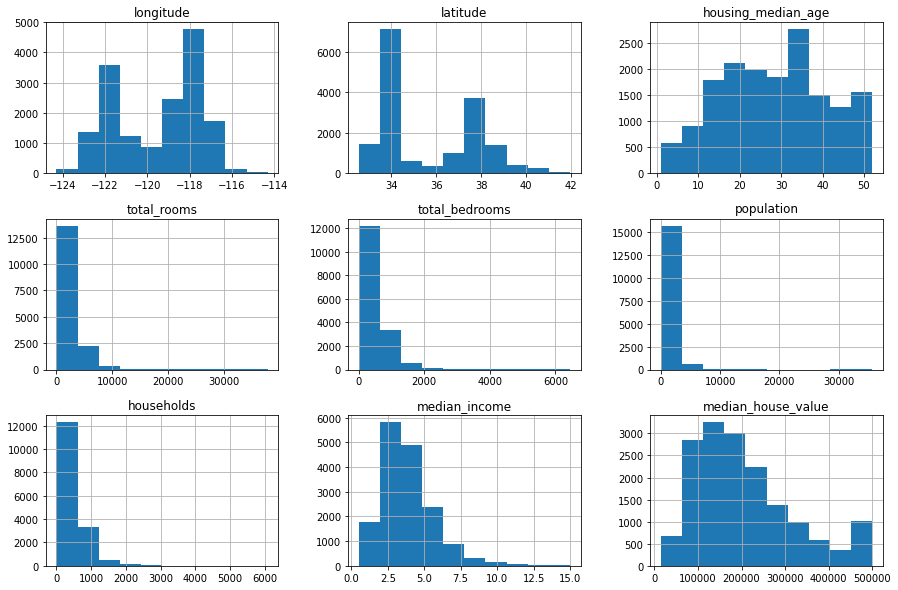

In [28]:
train_data.hist(figsize=(15,10))

In [31]:
numeric_data = train_data.select_dtypes(include=[float, int])

In [33]:
numeric_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924027,-0.106552,0.043701,0.067767,0.097128,0.054632,-0.018129,-0.047420
latitude,-0.924027,1.000000,0.011345,-0.033711,-0.063401,-0.105079,-0.068562,-0.078995,-0.142700
housing_median_age,-0.106552,0.011345,1.000000,-0.359614,-0.320584,-0.294355,-0.303247,-0.119202,0.109444
total_rooms,0.043701,-0.033711,-0.359614,1.000000,0.930196,0.855959,0.918661,0.196080,0.128447
total_bedrooms,0.067767,-0.063401,-0.320584,0.930196,1.000000,0.875844,0.979589,-0.009583,0.045145
population,0.097128,-0.105079,-0.294355,0.855959,0.875844,1.000000,0.905788,0.004212,-0.027931
households,0.054632,-0.068562,-0.303247,0.918661,0.979589,0.905788,1.000000,0.012706,0.060465
median_income,-0.018129,-0.078995,-0.119202,0.196080,-0.009583,0.004212,0.012706,1.000000,0.687243
median_house_value,-0.047420,-0.142700,0.109444,0.128447,0.045145,-0.027931,0.060465,0.687243,1.000000


<Axes: >

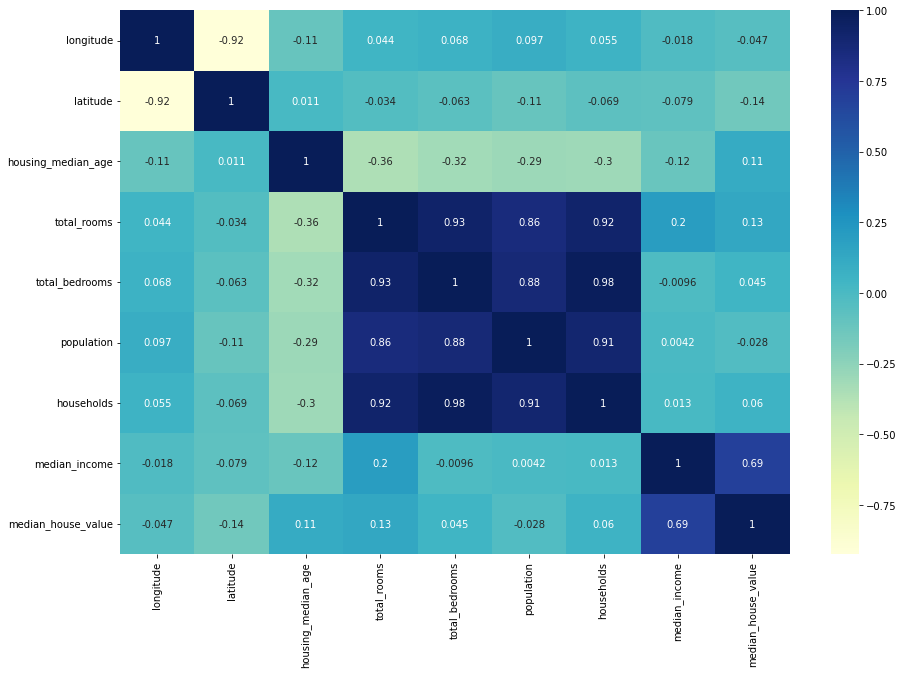

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")

In [37]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

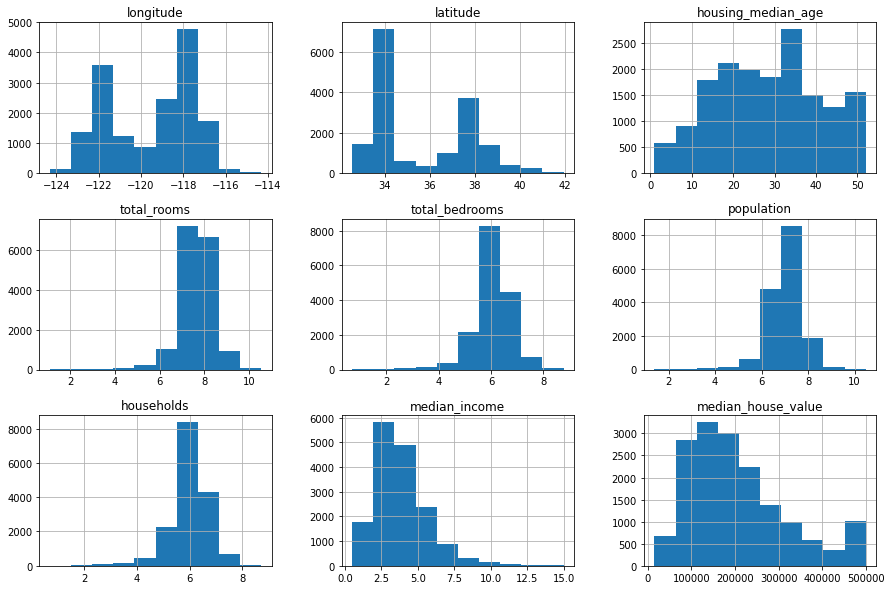

In [38]:
train_data.hist(figsize=(15,10))

In [42]:
dummies = pd.get_dummies(train_data['ocean_proximity'])

In [43]:
dummies = dummies.astype(int)

In [44]:
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7947,1,0,0,0,0
9679,0,1,0,0,0
16977,0,0,0,0,1
16326,0,1,0,0,0
17313,1,0,0,0,0


In [52]:
train_data = train_data.join(dummies).drop(['ocean_proximity'], axis=1)

<Axes: >

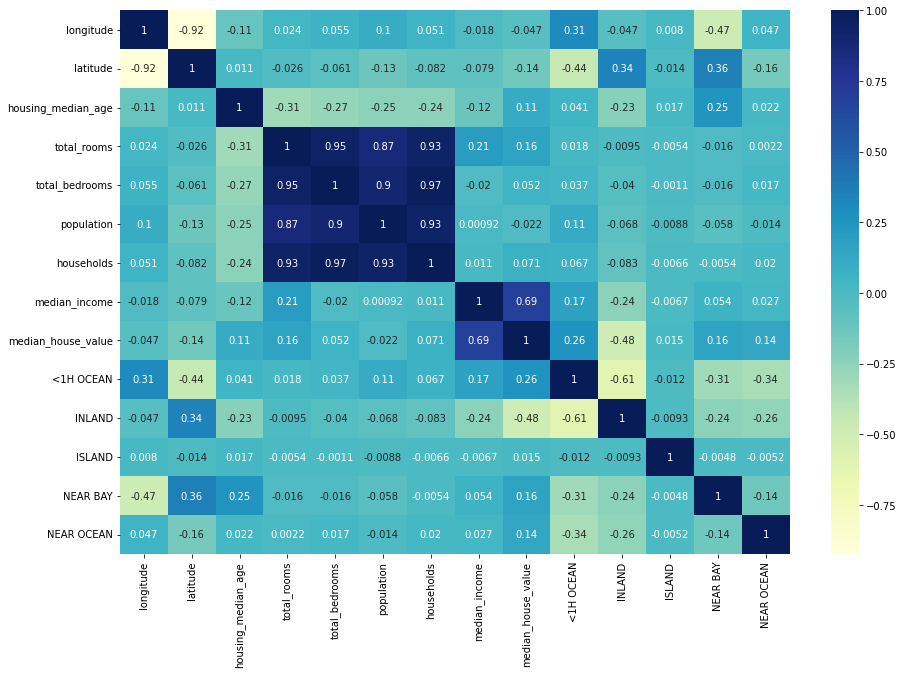

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

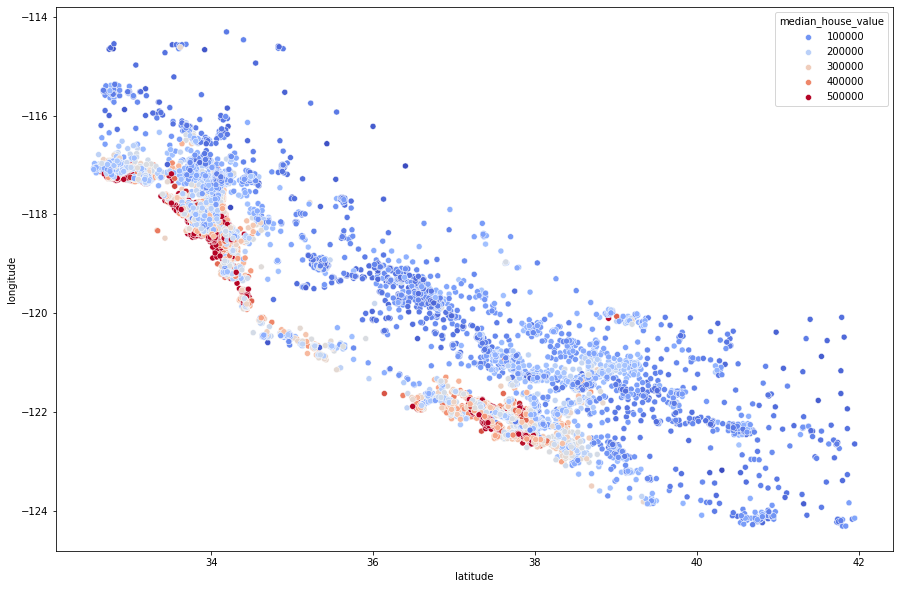

In [55]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [57]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

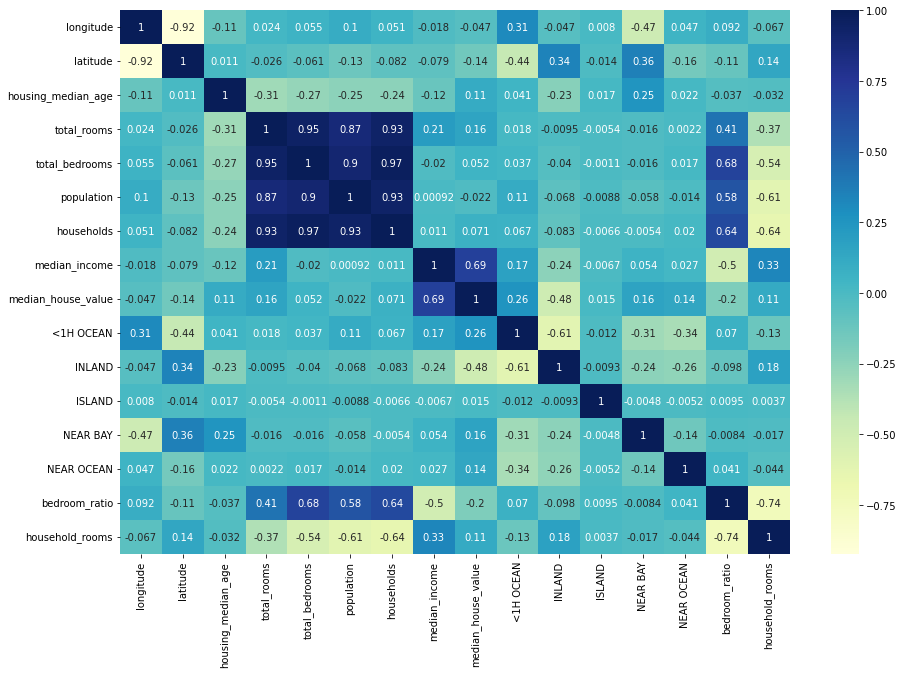

In [58]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, Y_train)

LinearRegression()

In [74]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

dummies = pd.get_dummies(test_data['ocean_proximity'])
dummies = dummies.astype(int)
test_data = test_data.join(dummies).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']

X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform

In [75]:
reg.score(X_test, Y_test)

0.6859279476617098